In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [87]:
df = pd.read_csv('https://raw.githubusercontent.com/TahlonBrahic/Data-Science-Portfolio/main/Data%20Analysis/GDP%20vs%20Life%20Expectancy/all_data.csv')
countries = df.Country.unique().tolist()

# Summary statistics

C:\Users\Tahlon\AppData\Local\Temp\ipykernel_31128\280884475.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['filler' ,'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']) # why does this 0 index?


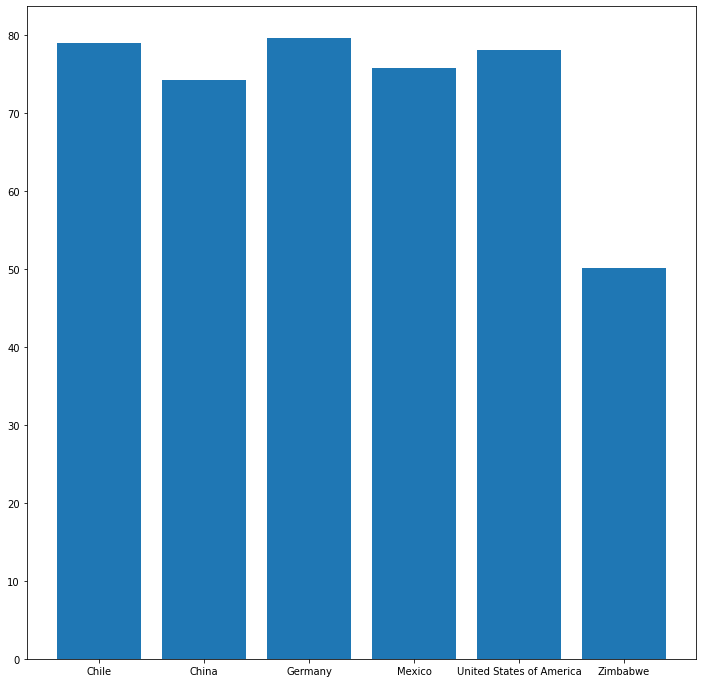

<Figure size 432x288 with 0 Axes>

In [121]:
mean_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].mean()
min_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].min()
max_life_expectancy = df.groupby('Country')['Life expectancy at birth (years)'].max()
plt.figure(figsize=(12,12))
ax = plt.subplot()
plt.bar(range(len(countries)), mean_life_expectancy)
ax.set_xticklabels(['filler' ,'Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']) # why does this 0 index?
plt.show()
plt.clf()

# Divide Countries

In [97]:
chile = df[df['Country'] == 'Chile']
china = df[df['Country'] == 'China']
germany = df[df['Country'] == 'Germany']
mexico = df[df['Country'] == 'Mexico']
usa = df[df['Country'] == 'United States of America']
zimbabwe = df[df['Country'] == 'Zimbabwe']

# Plot life expectancy over years

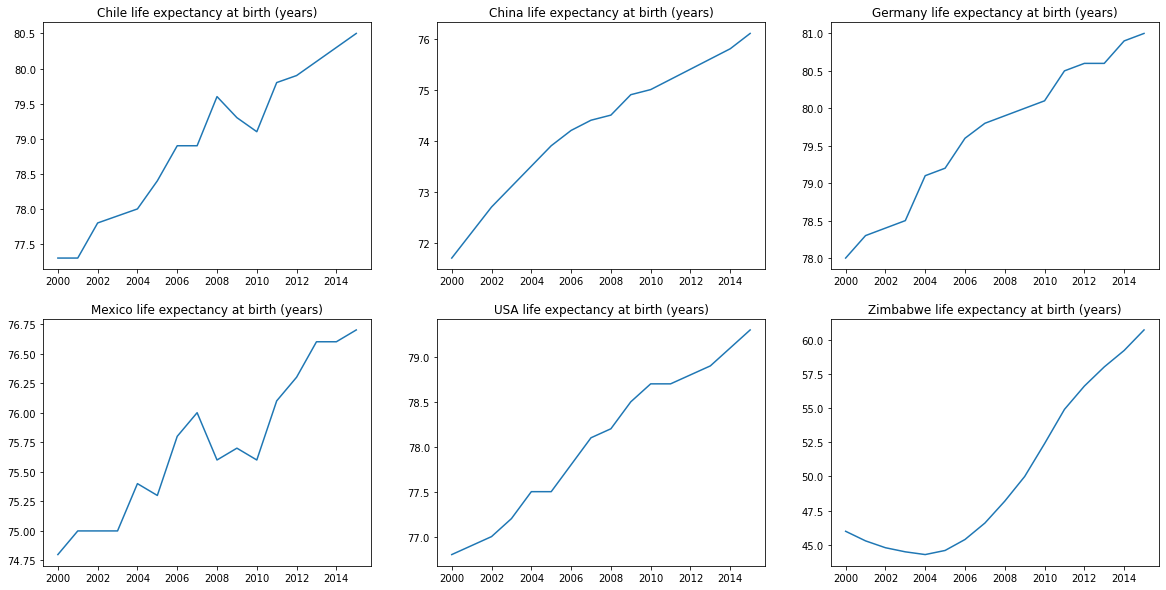

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.plot(chile.Year, chile['Life expectancy at birth (years)'])
plt.title('Chile life expectancy at birth (years)')
plt.subplot(2,3,2)
plt.plot(china.Year, china['Life expectancy at birth (years)'])
plt.title('China life expectancy at birth (years)')
plt.subplot(2,3,3)
plt.plot(germany.Year, germany['Life expectancy at birth (years)'])
plt.title('Germany life expectancy at birth (years)')
plt.subplot(2,3,4)
plt.plot(mexico.Year, mexico['Life expectancy at birth (years)'])
plt.title('Mexico life expectancy at birth (years)')
plt.subplot(2,3,5)
plt.plot(usa.Year, usa['Life expectancy at birth (years)'])
plt.title('USA life expectancy at birth (years)')
plt.subplot(2,3,6)
plt.plot(zimbabwe.Year, zimbabwe['Life expectancy at birth (years)'])
plt.title('Zimbabwe life expectancy at birth (years)')
plt.show()